In [35]:
#Import the pandas library to work with the datat
import pandas as pd


In [36]:
#Import the Cars93 data and create a dataset 
#display a summary of the data
cars = pd.read_csv("Cars93.csv")
cars.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [37]:
#Explore the dataset to see what feautures exists
cars.drop('Unnamed: 0', axis=1).columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [38]:
#Create a seeparate dataset with only the parameneters of interest for our analysis
cars_reduced = cars[["Type","MPG.city","AirBags","DriveTrain","Cylinders","EngineSize", "Horsepower",
"RPM", "Rev.per.mile", "Fuel.tank.capacity","Length", "Wheelbase", "Width","Turn.circle", "Weight"]]
#display a few rows of the new dataset
cars_reduced.head()

,Type,MPG.city,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Length,Wheelbase,Width,Turn.circle,Weight
0,Small,25,NaN,Front,4,1.8,140,6300,2890,13.2,177,102,68,37,2705
1,Midsize,18,Driver & Passenger,Front,6,3.2,200,5500,2335,18.0,195,115,71,38,3560
2,Compact,20,Driver only,Front,6,2.8,172,5500,2280,16.9,180,102,67,37,3375
3,Midsize,19,Driver & Passenger,Front,6,2.8,172,5500,2535,21.1,193,106,70,37,3405
4,Midsize,22,Driver only,Rear,4,3.5,208,5700,2545,21.1,186,109,69,39,3640


In [39]:
#differentiate categorical data from numerical data
columns = ["MPG.city","EngineSize","Horsepower","RPM","Length","Wheelbase","Turn.circle","DriveTrain","Type","AirBags"]
cars_reduced[columns].head(10)

,MPG.city,EngineSize,Horsepower,RPM,Length,Wheelbase,Turn.circle,DriveTrain,Type,AirBags
0,25,1.8,140,6300,177,102,37,Front,Small,NaN
1,18,3.2,200,5500,195,115,38,Front,Midsize,Driver & Passenger
2,20,2.8,172,5500,180,102,37,Front,Compact,Driver only
3,19,2.8,172,5500,193,106,37,Front,Midsize,Driver & Passenger
4,22,3.5,208,5700,186,109,39,Rear,Midsize,Driver only
5,22,2.2,110,5200,189,105,41,Front,Midsize,Driver only
6,19,3.8,170,4800,200,111,42,Front,Large,Driver only
7,16,5.7,180,4000,216,116,45,Rear,Large,Driver only
8,19,3.8,170,4800,198,108,41,Front,Midsize,Driver only
9,16,4.9,200,4100,206,114,43,Front,Large,Driver only


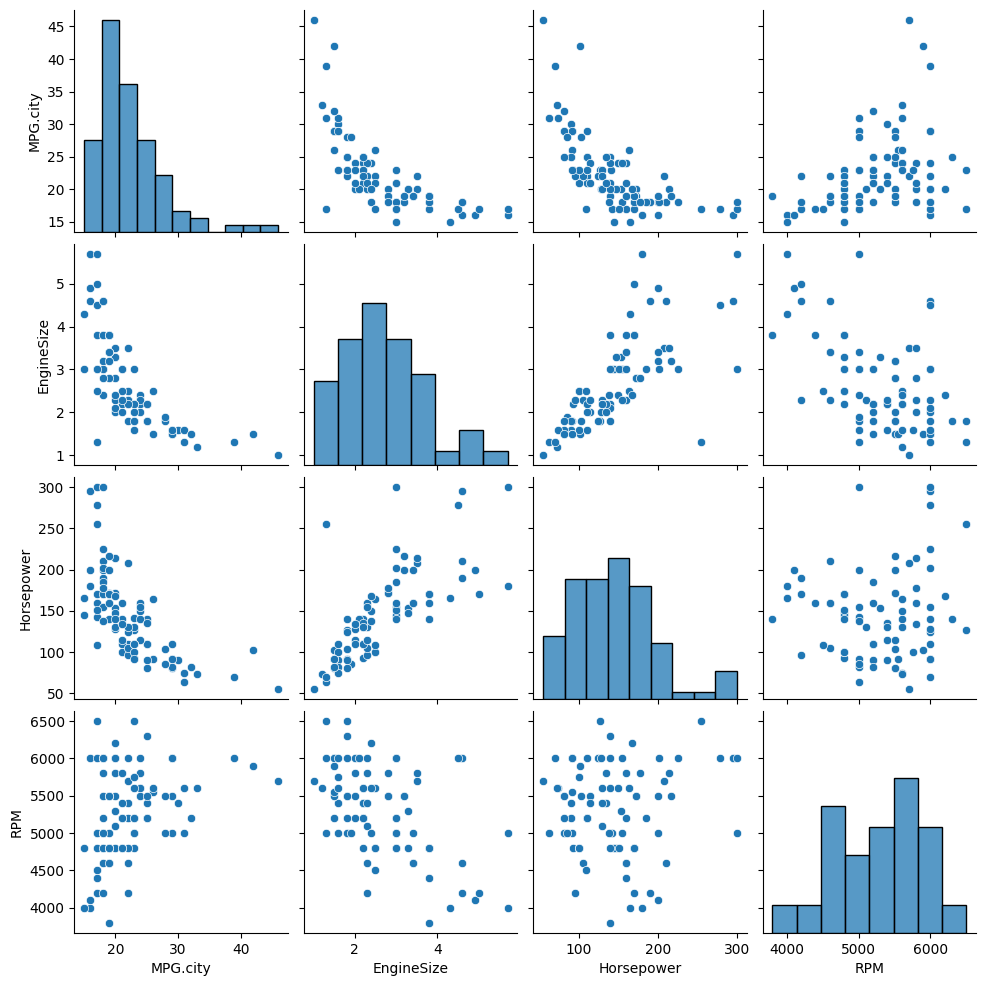

In [40]:
#draw a scatter plot to see if the association between the first 5 comparisons may be linear
import seaborn as sns
sns.pairplot(cars_reduced, vars=["MPG.city", "EngineSize", "Horsepower", "RPM"])

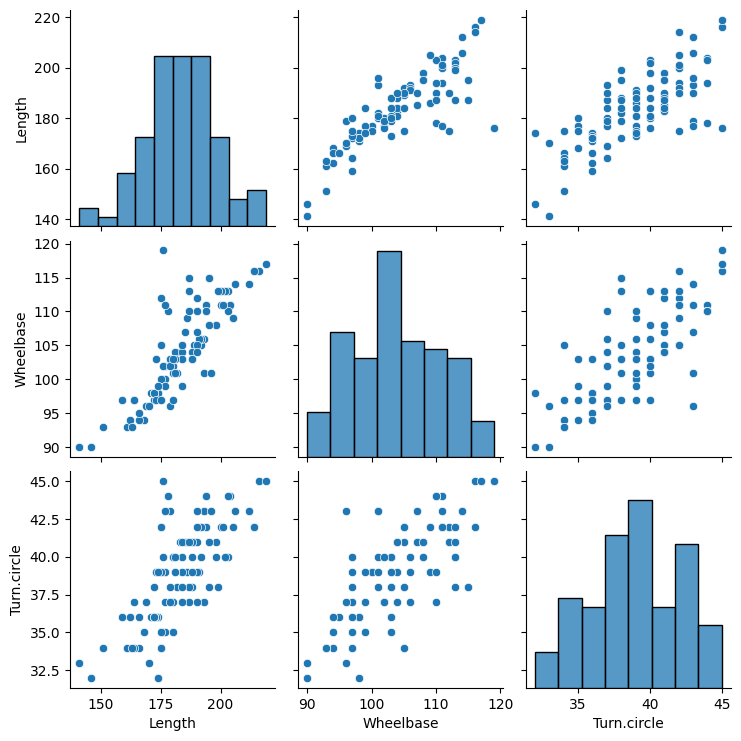

In [41]:
#Check the association between comparisons 6-8
sns.pairplot(cars_reduced, vars=["Length", "Wheelbase","Turn.circle"])

In [42]:
#Calcualte the covariance between MPG.city and EngineSize
sum((cars["MPG.city"]- cars["MPG.city"].mean())*
    (cars["EngineSize"]-(cars["EngineSize"].mean()))/(cars.shape[0]-1))

-4.139165497896213

In [43]:
#ALT: Calcualte the covariance between MPG.city and EngineSize
cars["EngineSize"].cov(cars["MPG.city"])

np.float64(-4.139165497896213)

In [44]:
#Calculate the covariance for the rest of the linear associations
cars["EngineSize"].cov(cars["Horsepower"])

np.float64(39.776998597475455)

In [45]:
cars["Horsepower"].cov(cars["MPG.city"])

np.float64(-197.9798971482001)

In [46]:
cars["RPM"].cov(cars["MPG.city"])

np.float64(1217.4789621318369)

In [47]:
cars["Length"].cov(cars["Wheelbase"])

np.float64(82.02197288452543)

In [48]:
cars["Length"].cov(cars["Turn.circle"])

np.float64(34.780621785881266)

In [49]:
cars["Wheelbase"].cov(cars["Turn.circle"])

np.float64(15.899836372136514)

In [50]:
#use the covariance matrix to capture these parameters
cars[["MPG.city", "Horsepower","EngineSize", "RPM"]].cov()

,MPG.city,Horsepower,EngineSize,RPM
MPG.city,31.582281,-197.979897,-4.139165,1217.478962
Horsepower,-197.979897,2743.078775,39.776999,1146.633941
EngineSize,-4.139165,39.776999,1.076122,-339.163745
RPM,1217.478962,1146.633941,-339.163745,356088.709677


In [51]:
# perform the Shapiro-Wilk test on Turn.circle, Length and Wheelbase variables
from scipy.stats import shapiro
shapiro(cars["Turn.circle"])


ShapiroResult(statistic=np.float64(0.9762532984591501), pvalue=np.float64(0.08784834101666773))

In [52]:
shapiro(cars["Length"])

ShapiroResult(statistic=np.float64(0.9909826881130179), pvalue=np.float64(0.7838802757530139))

In [53]:
shapiro(cars["Wheelbase"])

ShapiroResult(statistic=np.float64(0.9785543847906336), pvalue=np.float64(0.12946563318251336))

In [54]:
#use the qqplot to evaluate the distribution of the above variables
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm

sm.qqplot(cars["Turn.circle"])
plt.legend(["turn.cirlce"])
plt.show()

sm.qqplot(cars["Length"])
plt.legend(["Length"])
plt.show()

sm.qqplot(cars["Wheelbase"])
plt.legend(["Wheelbase"])
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
#let's look at the strenght of the associations between lenght and Turn.circle, Turn.circle and Wheelbase
# first compute the covariance, then the pearson correlation for each
print("Covariance for Lenght and Turn.cirlce: ", cars["Length"].cov(cars["Turn.circle"]))
print("Correlation for Lenght and Turn.cirlce: ",cars["Length"].corr(cars["Turn.circle"],method="pearson"))
print()
print("Covariance for Turn.cirlce and Wheelbase: ", cars["Turn.circle"].cov(cars["Wheelbase"]))
print("Correlation for Turn.cirlce and Wheelbase: ", cars["Turn.circle"].corr(cars["Wheelbase"], method="pearson"))


In [ ]:
# chek the spearman correlation between Horsepower and MPG.city, RPM and MPG.city, and EngineSize and MPG.city
cars["Horsepower"].corr(cars["MPG.city"],method="spearman")

In [ ]:
cars["RPM"].corr(cars["MPG.city"],method="spearman")

In [ ]:
cars["EngineSize"].corr(cars["MPG.city"],method="spearman")

In [ ]:
# how does the spearman and pearson correlation differs for RPM & MPG.city
print("Spearman correlation RPM and MPG.city: ", cars["RPM"].corr(cars["MPG.city"],method="spearman"))
print("Pearson correlation RPM and MPG.city: ",cars["RPM"].corr(cars["MPG.city"],method="pearson"))

In [ ]:
# illustrate the pearson correlation of these variables using the correlation matrix
cars[["MPG.city","EngineSize","Horsepower","RPM"]].corr()

In [ ]:
#Examine the relationship between DriveTrain and Type using a Two-way table
two_way_table = pd.crosstab(index=cars["DriveTrain"],columns=cars["Type"])
two_way_table.index = ["4WD","Front","Rear"]
two_way_table

In [ ]:
# perform the chi-squared test on the same variables
from scipy.stats import chi2_contingency,chi2
chi2.ppf(1-0.05,10)
chi2_contingency(two_way_table)

In [ ]:
cars[["Man.trans.avail","Origin"]].head(10)


In [58]:
# create a two-way table between Man.trans.avail and Origin
origin_trans = pd.crosstab(index=cars["Man.trans.avail"],columns=cars["Origin"])
origin_trans.index = ["No","Yes"]
origin_trans["Sum"] = origin_trans.sum(axis=1)
origin_trans


Origin,USA,non-USA,Sum
No,26,6,32
Yes,22,39,61


In [64]:
# create an index Sum with the sum of values in rows
other = origin_trans.sum(axis=0)
other = pd.DataFrame({"Sum":list(other)})
other.index=["USA","non-USA","Sum"]
transposed_other = other.T
origin_trans._append(transposed_other,sort=False)

,USA,non-USA,Sum
No,26,6,32
Yes,22,39,61
Sum,48,45,93


In [68]:
# calculate the Pearson correlation coefficient for the above
man_vec = cars["Man.trans.avail"].apply(lambda x: 1 if x=="Yes" else 0)
origin_vec = cars["Origin"].apply(lambda x: 1 if x=="USA" else 0)

c = man_vec.corr(origin_vec, method="pearson")
print(float(c))


-0.4295382099074451


In [71]:
#convert the most frequent purchased items to a sparse matrix and create a bar plot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("marketbasket-caraccessories.xlsx")


,Seat Cover,Audio system,Car cover,Steering Cover,Toolbox,Foot mats,Mud flaps,Window tint
0,y,NaN,y,NaN,NaN,y,y,NaN
1,y,y,NaN,y,NaN,y,NaN,NaN
2,NaN,NaN,y,NaN,NaN,NaN,NaN,y
3,NaN,y,NaN,NaN,NaN,NaN,y,y
4,NaN,NaN,NaN,NaN,y,NaN,NaN,NaN


In [72]:
#clean the dataframe (replace NAN values with 0's and y values with 1's)
df = df.replace(float("nan"),0)
df.head()

,Seat Cover,Audio system,Car cover,Steering Cover,Toolbox,Foot mats,Mud flaps,Window tint
0,y,0,y,0,0,y,y,0
1,y,y,0,y,0,y,0,0
2,0,0,y,0,0,0,0,y
3,0,y,0,0,0,0,y,y
4,0,0,0,0,y,0,0,0


In [73]:
df = df.replace("y",1)
df.head()

C:\Users\Naomie  Fillies\AppData\Local\Temp\ipykernel_14092\3561620336.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("y",1)


,Seat Cover,Audio system,Car cover,Steering Cover,Toolbox,Foot mats,Mud flaps,Window tint
0,1,0,1,0,0,1,1,0
1,1,1,0,1,0,1,0,0
2,0,0,1,0,0,0,0,1
3,0,1,0,0,0,0,1,1
4,0,0,0,0,1,0,0,0


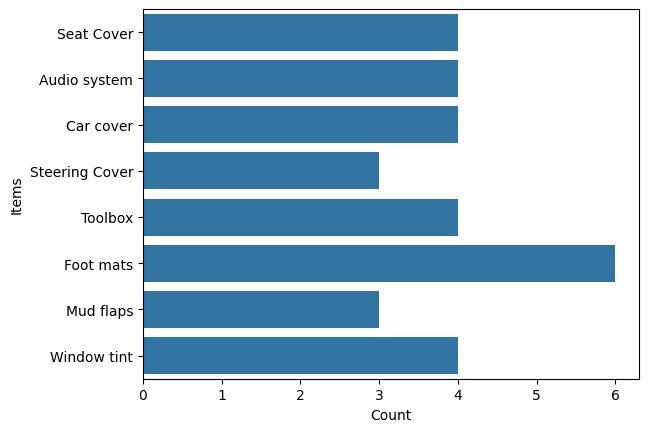

In [75]:
#prepare the data for the barplot
df = pd.DataFrame({"Items":list(df.columns), "Count":list(df.sum(axis=0))})
#plot bar barplot
bar = sns.barplot(data = df, y="Items", x="Count")

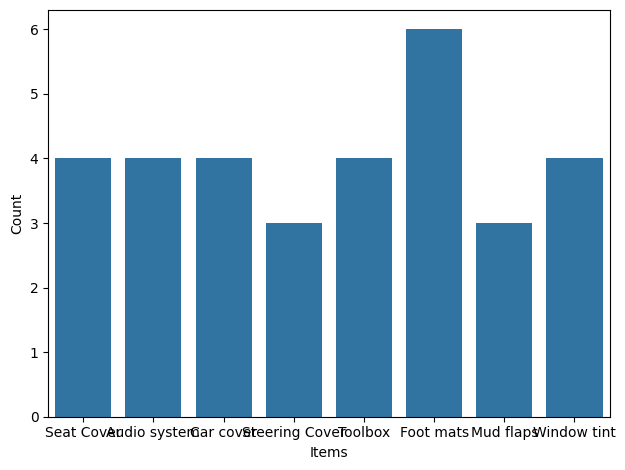

In [84]:
bar = sns.barplot(data = df, x="Items", y="Count")
bar = plt.tight_layout()

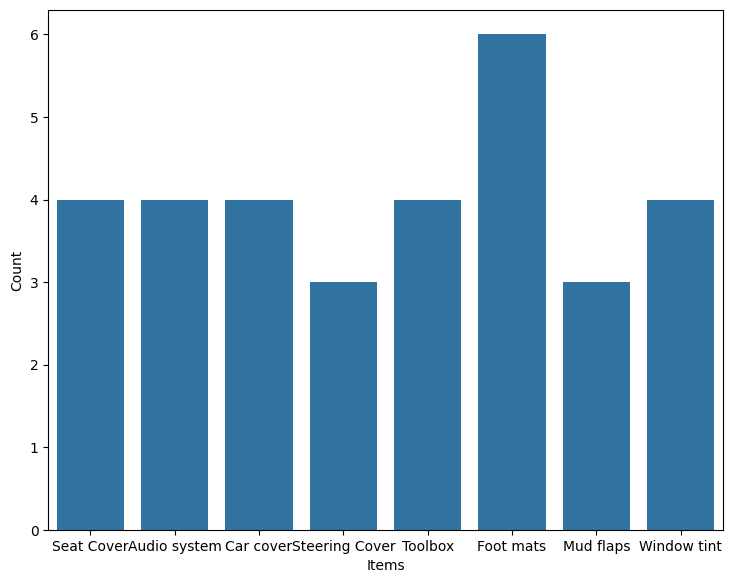

In [99]:
bar = sns.barplot(data = df, x="Items", y="Count")
bar =plt.tight_layout(pad=-3, w_pad=7, h_pad=1.0)

In [103]:
#mine for associations using the apriori technique
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

file = open("Groceries.csv", "r")
strings = []
for i in file.readlines():
    strings.append(i.strip().split("\n"))
strings

[['citrus fruit,semi-finished bread,margarine,ready soups'],
 ['tropical fruit,yogurt,coffee'],
 ['whole milk'],
 ['pip fruit,yogurt,cream cheese,meat spreads'],
 ['other vegetables,whole milk,condensed milk,long life bakery product'],
 ['whole milk,butter,yogurt,rice,abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables,UHT-milk,rolls/buns,bottled beer,liquor (appetizer)'],
 ['potted plants'],
 ['whole milk,cereals'],
 ['tropical fruit,other vegetables,white bread,bottled water,chocolate'],
 ['citrus fruit,tropical fruit,whole milk,butter,curd,yogurt,flour,bottled water,dishes'],
 ['beef'],
 ['frankfurter,rolls/buns,soda'],
 ['chicken,tropical fruit'],
 ['butter,sugar,fruit/vegetable juice,newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk,pastry'],
 ['whole milk'],
 ['tropical fruit,cream cheese,processed cheese,detergent,newspapers'],
 ['tropical fruit,root vegetables,other vegetables

In [107]:
dataset = []
for i in strings:
    dataset.append(i[0].split(","))
print(dataset)

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'], ['tropical fruit', 'yogurt', 'coffee'], ['whole milk'], ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'], ['other vegetables', 'whole milk', 'condensed milk', 'long life bakery product'], ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'], ['rolls/buns'], ['other vegetables', 'UHT-milk', 'rolls/buns', 'bottled beer', 'liquor (appetizer)'], ['potted plants'], ['whole milk', 'cereals'], ['tropical fruit', 'other vegetables', 'white bread', 'bottled water', 'chocolate'], ['citrus fruit', 'tropical fruit', 'whole milk', 'butter', 'curd', 'yogurt', 'flour', 'bottled water', 'dishes'], ['beef'], ['frankfurter', 'rolls/buns', 'soda'], ['chicken', 'tropical fruit'], ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'], ['fruit/vegetable juice'], ['packaged fruit/vegetables'], ['chocolate'], ['specialty bar'], ['other vegetables'], ['butter milk', 'pastry'], ['whole milk'], ['tropical fruit', 'cream c

In [108]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=0.07, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.080529,(bottled beer)
1,0.110524,(bottled water)
2,0.077682,(canned beer)
3,0.082766,(citrus fruit)
4,0.072293,(fruit/vegetable juice)
5,0.079817,(newspapers)
6,0.193493,(other vegetables)
7,0.088968,(pastry)
8,0.075648,(pip fruit)
9,0.183935,(rolls/buns)


In [128]:
association_rules(frequent_itemsets,num_itemsets = len(frequent_itemsets), metric='confidence', min_threshold=0.1).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,1.0,0.025394,1.140548,0.455803,0.2,0.123228,0.339817
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,1.0,0.025394,1.214013,0.420750,0.2,0.176286,0.339817


In [130]:
association_rules(frequent_itemsets, num_itemsets = len(frequent_itemsets),metric="lift", min_threshold=1).head() #lift metric with higher threshold


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,1.0,0.025394,1.140548,0.455803,0.2,0.123228,0.339817
1,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,1.0,0.025394,1.214013,0.420750,0.2,0.176286,0.339817
